In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


Data Set cleaning and Preprocessing

In [ ]:
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv("processed.cleveland.data",  names=cols)
df['target'] = df['target'].replace({2: 1, 3: 1, 4: 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Replace '?' with NaN
df = df.replace('?', np.nan)

# Convert columns to numeric, coerce errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Impute missing values using the mean of each column
# or choose a different strategy if more appropriate.
df = df.fillna(df.mean())

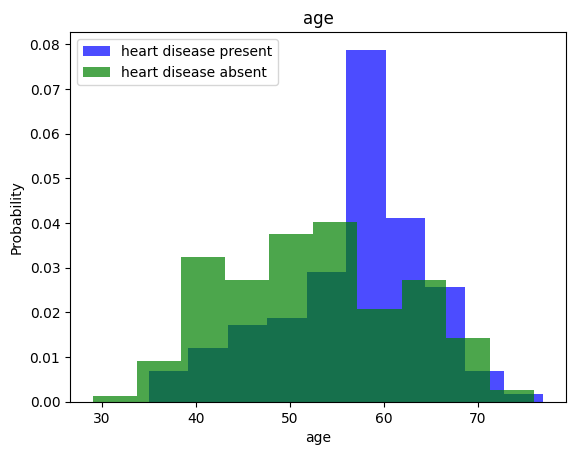

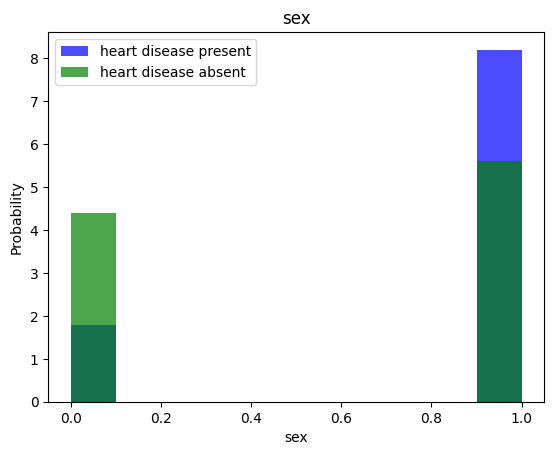

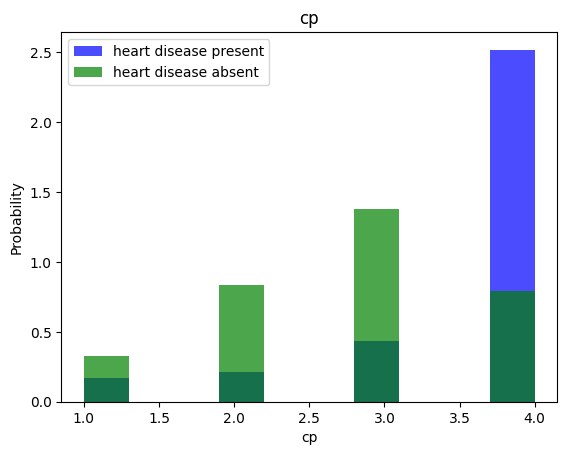

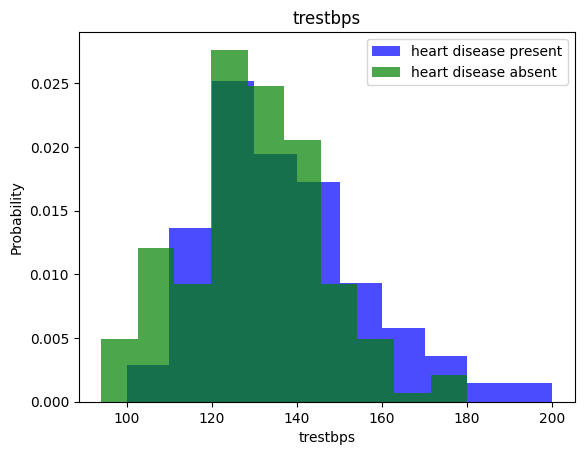

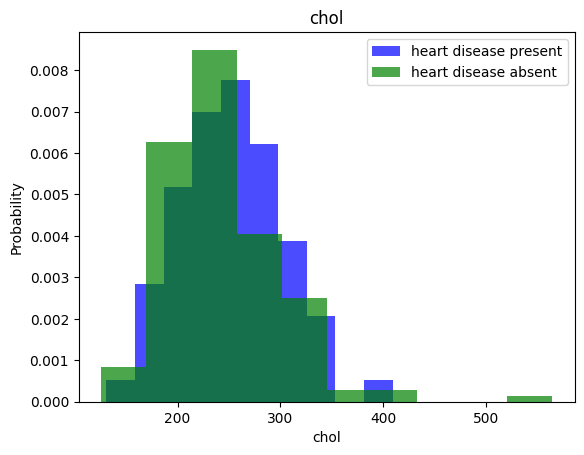

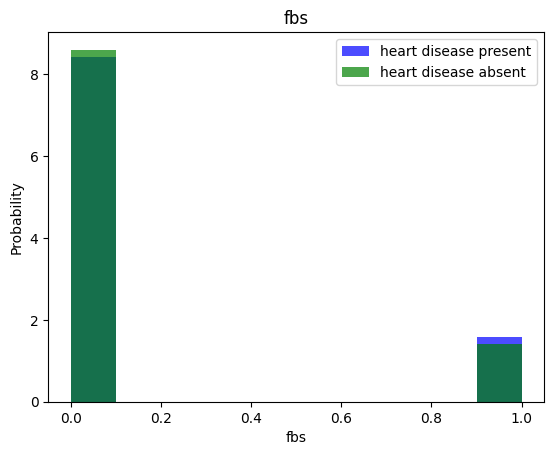

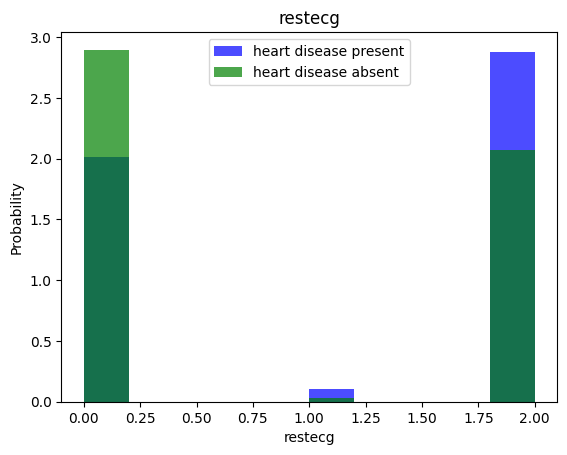

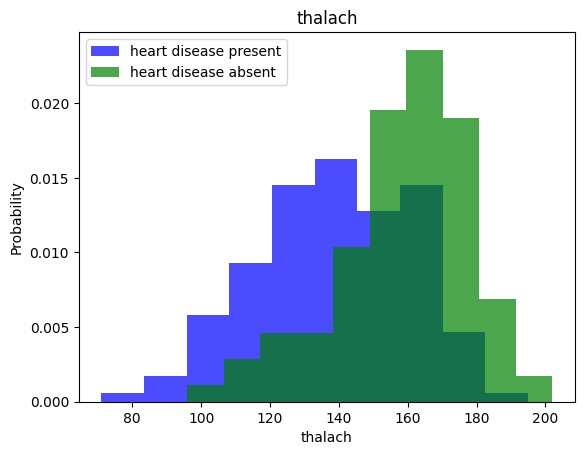

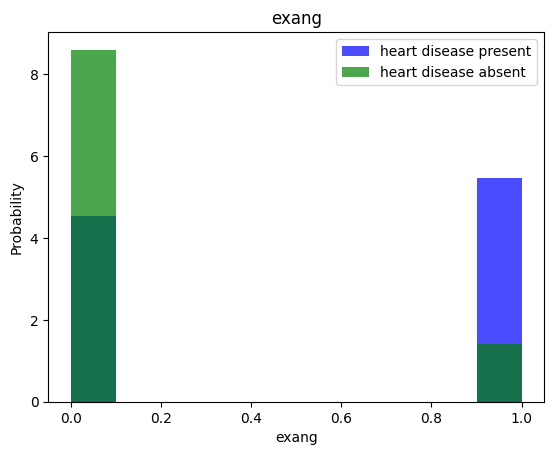

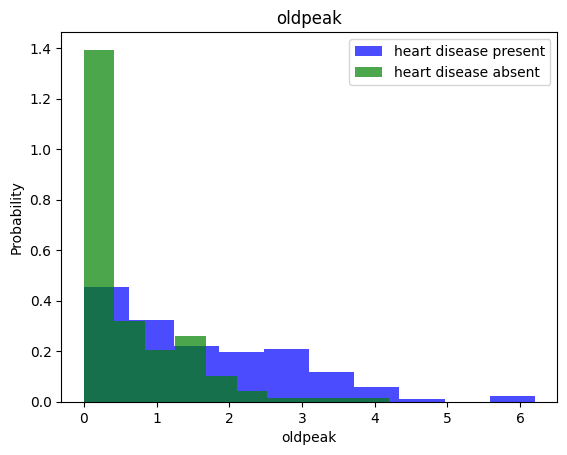

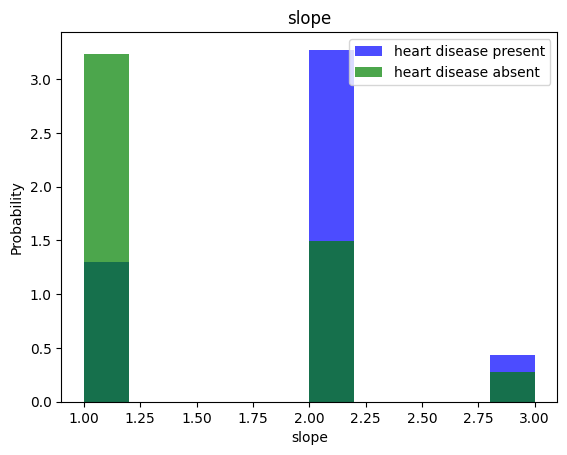

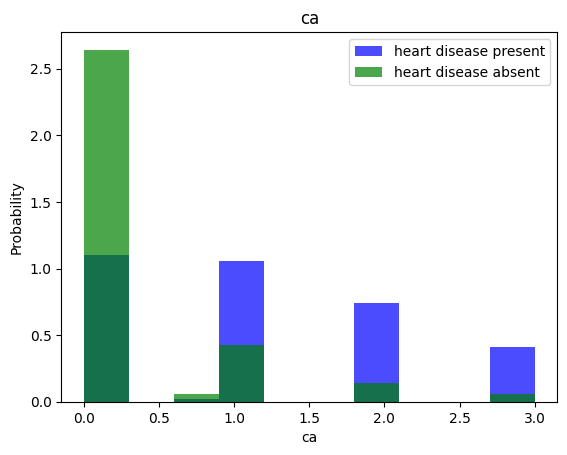

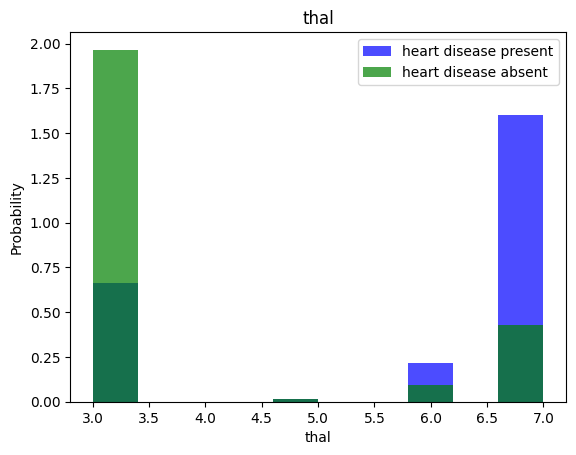

In [ ]:
for label in cols[:-1]:
   mp.hist(df[df['target'] == 1][label], color='blue', label='heart disease present', alpha=0.7, density=True)
   mp.hist(df[df['target'] == 0][label], color='green', label='heart disease absent', alpha=0.7, density=True)
   mp.title(label)
   mp.ylabel('Probability')
   mp.xlabel(label)
   mp.legend()
   mp.show()

Splitting the data set for training, Validation and testing

In [ ]:
train, test = np.split(df.sample(frac=1, random_state=42), [int(0.70*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Data before oversampling

In [ ]:
print(len(train [train['target'] == 1]))
print(len(train [train['target'] == 0]))

95
117


Scaling and oversampling


In [ ]:
def scale_data(df, oversample = False):
  x = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  RANDOM_STATE = 42;
  if oversample:
    ros = RandomOverSampler(random_state=RANDOM_STATE)
    x, y = ros.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1)))) #creating a 2D  numpy array

  return data, x, y


In [ ]:
train_s, x_train, y_train = scale_data(train, oversample=True)
test_s, x_test, y_test = scale_data(test, oversample=False)
#validate_s, x_validate, y_validate = scale_data(validate, oversample=False)


In [ ]:
sum(y_train==1)


117

In [ ]:
sum(y_train==0)

117

In [ ]:
import math
math.sqrt(len(y_test))

9.539392014169456

K-Nearest N


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

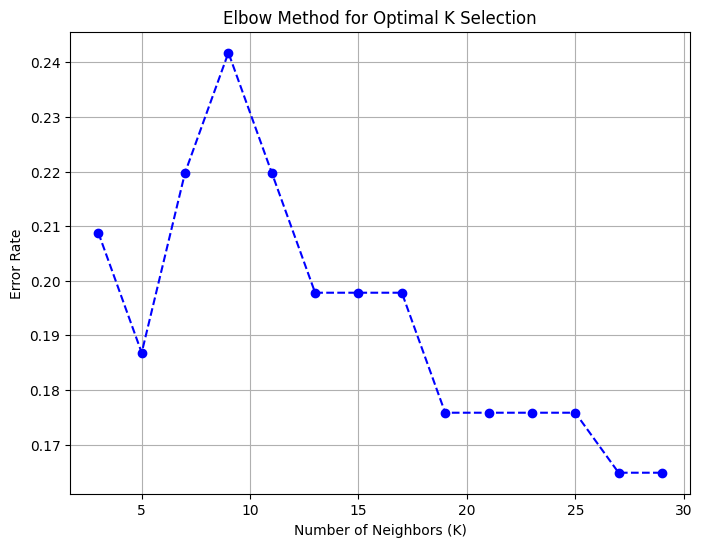

In [ ]:
# List of K values to test
k_values = list(range(3, 31, 2))  # Test only odd K values between 3 and 30
error_rates = []  # Store error rates

# Compute error rate for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Calculate error rate
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

# Create Elbow Plot
plt.figure(figsize=(8,6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal K Selection")
plt.grid()
plt.show()

In [ ]:
kn_model = KNeighborsClassifier(n_neighbors=19, p =2, metric='euclidean')
kn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [ ]:
y_pred = kn_model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0])

In [ ]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0])

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, y_pred)
knn_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test, y_pred))

confusion matrix
[[41  6]
 [10 34]]


Accuracy of K-NeighborsClassifier: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.85      0.77      0.81        44

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lg_model = LogisticRegression(random_state=0)
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
lg_pred = lg_model.predict(x_test)
lg_conf_matrix = confusion_matrix(y_test, lg_pred)
lg_acc_score = accuracy_score(y_test, lg_pred)
print("confussion matrix")
print(lg_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lg_acc_score*100,'\n')
print(classification_report(y_test,lg_pred))

confussion matrix
[[41  6]
 [ 9 35]]


Accuracy of Logistic Regression: 83.51648351648352 

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        47
           1       0.85      0.80      0.82        44

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 0.5, 1, 5, 10],  # Range of gamma values
    'kernel': ['rbf']  # Using RBF kernel
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best gamma and C values
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best Gamma: {best_gamma}")
print(f"Best C: {best_C}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train SVM with Best Gamma and C
svm_model = SVC(kernel='rbf', C=best_C, gamma=0.08)
svm_model.fit(x_train, y_train)

# Evaluate on the Test Set
y_pred = svm_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Gamma and C: {test_accuracy:.4f}")


Best Gamma: 0.1
Best C: 1
Best Cross-Validation Accuracy: 0.8548
Test Accuracy with Best Gamma and C: 0.8022


In [ ]:
def calculate_variance(data):
    """
    Calculates the variance of each feature in the dataset.

    :param data: A NumPy array or Pandas DataFrame of numerical values.
    :return: Variance of each feature.
    """
    if isinstance(data, pd.DataFrame):
        return data.var(ddof=0)  # Population variance
    elif isinstance(data, np.ndarray):
        return np.var(data, axis=0)  # Variance along columns (features)
    else:
        raise ValueError("Input should be a NumPy array or Pandas DataFrame.")
feature_variance = calculate_variance(x_train)

# Compute default gamma value
n_features = x_train.shape[1]  # Number of features
gamma_default = 1 / (n_features * feature_variance.mean())

print(f"Calculated Default Gamma: {gamma_default:.6f}")

# Grid Search for Best Parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.1, 0.5, 1, 5, 10, gamma_default],  # Including calculated gamma
    'kernel': ['rbf']  # Using RBF kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best gamma and C values
best_gamma = grid_search.best_params_['gamma']
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print(f"Best Gamma: {best_gamma}")
print(f"Best C: {best_C}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train SVM with Best Gamma and C
svm_model = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_model.fit(x_train, y_train)

# Evaluate on the Test Set
y_pred = svm_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Gamma and C: {test_accuracy:.4f}")

Calculated Default Gamma: 0.076461
Best Gamma: 0.1
Best C: 1
Best Cross-Validation Accuracy: 0.8548
Test Accuracy with Best Gamma and C: 0.8022


In [ ]:
y_pred = svm_model.predict(x_test)
svm_conf_matrix = confusion_matrix(y_test, y_pred)
svm_acc_score = accuracy_score(y_test, y_pred)
print("confusion matrix")
print(svm_conf_matrix)
print("\n")
print("Accuracy of SVM:",svm_acc_score*100,'\n')
print(classification_report(y_test,y_pred))

confusion matrix
[[40  7]
 [11 33]]


Accuracy of SVM: 80.21978021978022 

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.82      0.75      0.79        44

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



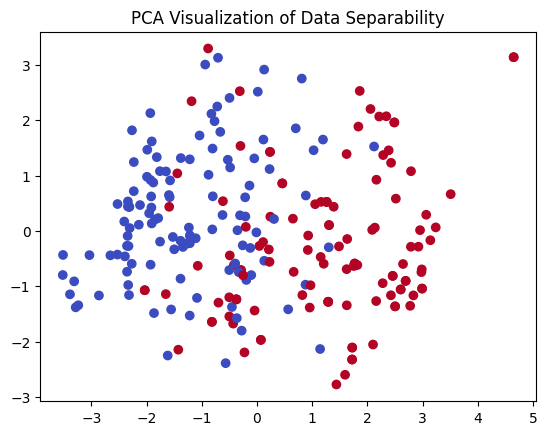

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm')
plt.title("PCA Visualization of Data Separability")
plt.show()


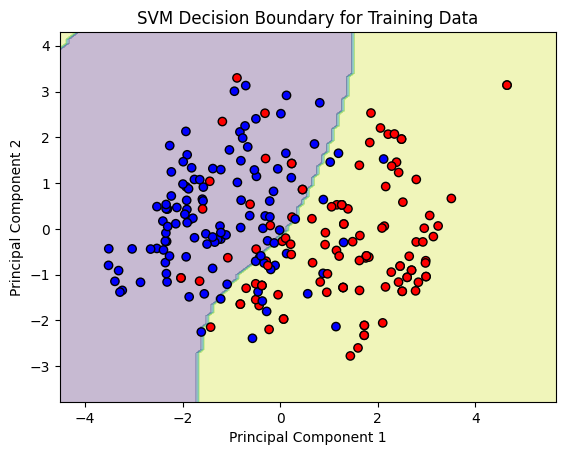

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Reduce the training data to 2D using PCA
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)

# Train SVM with RBF kernel on reduced 2D data
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(x_train_2d, y_train)

# Create meshgrid to plot decision boundary
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train, cmap=plt.cm.bwr, edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary for Training Data")
plt.show()


In [ ]:
import numpy as np
import cvxopt

# Given normalized data (Age, CP, Chol)
X = np.array([
    [0.63, -1.38, -0.24],
    [0.94, 0.92, 1.50],
    [0.94, 0.92, -0.38],
    [-1.42, 0.15, 0.32],
    [-1.10, -0.62, -1.20]
])

# Corresponding target labels (Y)
Y = np.array([1, -1, 1, -1, 1])  # Convert target labels to +1 and -1

# Define hyperparameters
C = 10  # Regularization parameter (from Grid Search)
gamma = 0.1  # Kernel parameter

# Compute RBF Kernel Matrix
def rbf_kernel(X1, X2, gamma):
    return np.exp(-gamma * np.linalg.norm(X1 - X2) ** 2)

# Build Gram Matrix (Kernel Matrix)
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf_kernel(X[i], X[j], gamma)

# Quadratic Programming Setup
P = cvxopt.matrix(np.outer(Y, Y) * K)  # QP Quadratic term
q = cvxopt.matrix(-np.ones(n_samples))  # QP Linear term
G = cvxopt.matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))  # Inequality constraints
h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
A = cvxopt.matrix(Y, (1, n_samples), 'd')  # Equality constraint
b = cvxopt.matrix(0.0)

# Solve the QP problem
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

# Extract α values
alphas = np.ravel(solution['x'])

# Print only support vectors (α > 1e-5)
print("Optimal Alpha values (only non-zero support vectors):")
for i in range(len(alphas)):
    if alphas[i] > 1e-5:
        print(f"α[{i}] = {alphas[i]:.4f}")

# Compute Bias (b) using Support Vectors
support_vector_idx = np.where(alphas > 1e-5)[0]
bias = np.mean([Y[i] - sum(alphas[j] * Y[j] * K[i, j] for j in support_vector_idx) for i in support_vector_idx])

print(f"Bias (b) = {bias:.4f}")


     pcost       dcost       gap    pres   dres
 0:  4.5751e-01 -1.2668e+02  1e+02  4e-16  2e-15
 1: -3.8530e+00 -1.6244e+01  1e+01  1e-16  8e-16
 2: -5.6288e+00 -6.6618e+00  1e+00  9e-17  3e-16
 3: -5.7227e+00 -5.7933e+00  7e-02  1e-16  3e-16
 4: -5.7285e+00 -5.7316e+00  3e-03  4e-16  5e-16
 5: -5.7285e+00 -5.7285e+00  3e-05  1e-16  4e-16
 6: -5.7285e+00 -5.7285e+00  3e-07  1e-16  3e-16
Optimal solution found.
Optimal Alpha values (only non-zero support vectors):
α[0] = 0.4628
α[1] = 2.2373
α[2] = 2.8719
α[3] = 3.4912
α[4] = 2.3938
Bias (b) = 0.0602
